# Text detection and recognition on medicine Images

We build this project to detect and recognize text on madicine images

Similarity comparation is made both on text and images



## CNN Overview

![CNN](http://personal.ie.cuhk.edu.hk/~ccloy/project_target_code/images/fig3.png)

## MNIST Dataset Overview

This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

In [29]:
import os
import cv2
import glob
import spacy
import time
import datetime
import data_helpers
import process_image
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import PIL
from PIL import Image
from random import randint
import matplotlib
import matplotlib.pyplot as plt
import pillowfight
import sys
import pyocr
import pyocr.builders

%matplotlib inline
print('All tools are imported successfully')

All tools are imported successfully


In [30]:
# Next is to prepare Tesseract OCR tools
tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("No OCR tool found")
    sys.exit(1)
# The tools are returned in the recommended order of usage
tool = tools[0]
print("Will use tool '%s'" % (tool.get_name()))
# Ex: Will use tool 'libtesseract'

langs = tool.get_available_languages()
print("Available languages: %s" % ", ".join(langs))
lang = langs[17]
print("-----Will use language:  '%s'" % (lang))

Will use tool 'Tesseract (sh)'
Available languages: kor, kor_vert, Thaana, kat_old, Syriac, mri, chr, ron, isl, lao, ind, mal, Arabic, Georgian, Hebrew, pol, Tamil, eng, san, jpn_vert, Japanese_vert, Oriya, oci, Fraktur, nld, mlt, lat, snd, hin, ltz, hat, Japanese, chi_tra_vert, Bengali, mya, spa, sun, msa, nep, Canadian_Aboriginal, Myanmar, srp, Cherokee, osd, cym, hun, ita_old, kir, Sinhala, chi_sim_vert, Vietnamese, iku, Cyrillic, rus, Gurmukhi, Devanagari, cat, pan, heb, que, chi_tra, Tibetan, Telugu, Malayalam, Gujarati, cos, kaz, mon, Ethiopic, syr, hrv, jav, ita, Khmer, pus, kat, Kannada, kur_ara, HanT, ces, ori, ceb, spa_old, chi_sim, slk, jpn, Latin, khm, lit, slv, swe, nor, HanS, Hangul, HanT_vert, swa, Armenian, Thai, sqi, kan, por, srp_latn, mkd, Lao, HanS_vert, hye, sin, lav, Hangul_vert, mar, Greek
-----Will use language:  'eng'


In [31]:
#-Load all images files for detection
ftypes = ('images/*.jpg', 'images/*.png','images/*.bmp', 'images/*.jpeg',
          'images/*.JPG', 'images/*.PNG', 'images/*.BMP', 'images/*.JPEG') 
files_grabbed = []
for files in ftypes:
    files_grabbed.extend(glob.glob(files))

print ('There are ' + str(len(files_grabbed)) + ' images loaded')

There are 22 images loaded


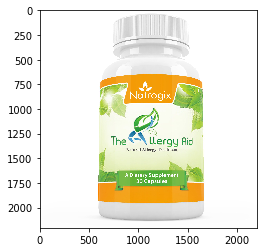

In [32]:
# Get some images to show
randindex = randint(0, len(files_grabbed)-1)
img = cv2.imread(files_grabbed[randindex])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [33]:
#Detect and recognize text on image
txt = tool.image_to_string(Image.fromarray(img), lang=lang, builder=pyocr.builders.TextBuilder())
print('------Following is raw text------')
print(txt)

print('------Following is cleaned text------')
print(data_helpers.process_raw(txt))

------Following is raw text------

------Following is cleaned text------



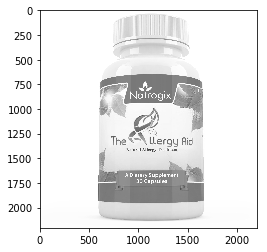

In [34]:
newimg = process_image.improve(files_grabbed[randindex])
newimgshow = cv2.cvtColor(newimg, cv2.COLOR_GRAY2RGB)
plt.imshow(newimgshow)

In [35]:
#Detect and recognize text on image
txt = tool.image_to_string(Image.fromarray(newimg), lang=lang, builder=pyocr.builders.TextBuilder())
print('------Following is raw text------')
print(txt)

print('------Following is cleaned text------')
print(data_helpers.process_raw(txt))

------Following is raw text------
Natural Allergy Treatment

A Dietary Supplement
30 Capsules
------Following is cleaned text------
natural allergy treatmenta dietary supplement30 capsules


In [36]:
#Following we write all recognize all images and write to database.
print('Following we write all recognize all images \n and write all text to database.')
with open ('result.txt', 'w', encoding = 'utf-8') as output:
    count = 1
    for f in files_grabbed:
        newimg = process_image.improve(f)
        txt = tool.image_to_string(Image.fromarray(newimg), lang=lang, builder=pyocr.builders.TextBuilder())
        #txt = pyocr.libtesseract.image_to_string(Image.open(f), lang=lang, builder=pyocr.builders.TextBuilder())
        cleantxt = data_helpers.process_raw(txt)
        #head, tail = os.path.split(f)
        #output.write(tail + '\n')
        output.write(cleantxt + '\n')
        time_str = datetime.datetime.now().isoformat()
        print("{}: image {} processed, total {:g}".format(time_str, count, len(files_grabbed)))
        #print('image ' + str(count) + '/' + str(len(files_grabbed)) + ' is processed')
        count += 1
        #if len(cleantxt) > 7:
        #    print('Image ' + str(count) + ' is processed:  ' + cleantxt)
        #    count += 1

Following we write all recognize all images 
 and write all text to database.
2018-07-20T16:12:31.868778: image 1 processed, total 22
2018-07-20T16:12:33.106240: image 2 processed, total 22
2018-07-20T16:12:35.573594: image 3 processed, total 22
2018-07-20T16:12:37.549886: image 4 processed, total 22
2018-07-20T16:12:38.265616: image 5 processed, total 22
2018-07-20T16:12:39.111147: image 6 processed, total 22
2018-07-20T16:12:43.100687: image 7 processed, total 22
2018-07-20T16:12:44.548040: image 8 processed, total 22
2018-07-20T16:12:50.251441: image 9 processed, total 22
2018-07-20T16:12:51.147142: image 10 processed, total 22
2018-07-20T16:12:52.920796: image 11 processed, total 22
2018-07-20T16:12:53.663021: image 12 processed, total 22
2018-07-20T16:12:55.718257: image 13 processed, total 22
2018-07-20T16:12:56.538131: image 14 processed, total 22
2018-07-20T16:12:58.561970: image 15 processed, total 22
2018-07-20T16:12:59.024199: image 16 processed, total 22
2018-07-20T16:12:59

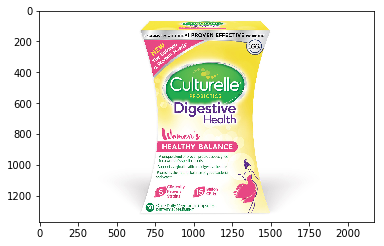

In [37]:
#Loat the test image
test_img = cv2.imread('4.jpg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img)

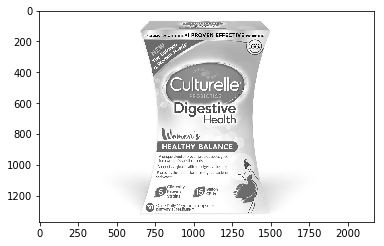

In [38]:
gray_test = process_image.improve('4.jpg')
gray_test = cv2.cvtColor(gray_test, cv2.COLOR_GRAY2RGB)
plt.imshow(gray_test)

In [39]:
test_txt = tool.image_to_string(Image.fromarray(gray_test), lang=lang, builder=pyocr.builders.TextBuilder())
print('------Following is raw text------')
print(test_txt)

print('------Following is cleaned text------')
clean_test = data_helpers.process_raw(test_txt)
print(clean_test)

------Following is raw text------
v

   
  

estive

Dig Health

  

Womens
ATIVE Nay eel

Aunique blend of proven probiotics designed \
for awoman’s specific needs ,
Supports vaginal health and digestive health* i
Promotes the natural balance of good bacteria
and yeast* i
Clinically Billion I
Proven CFUs SZ
Strains

Once Daily Vegetarian Capsules
DIETARY SUPPLEMENT
------Following is cleaned text------
v  estivedig health womensative nay eelaunique blend of proven probiotics designed \for awoman’s specific needs ,supports vaginal health and digestive health* ipromotes the natural balance of good bacteriaand yeast* iclinically billion iproven cfus szstrainsonce daily vegetarian capsulesdietary supplement


In [42]:
with open('result.txt', 'r') as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content]
print(len(content))
print(content[5])

22
activeherb”be active extract liu wei di huang tangar we hsfor professional use ah301e -  5:1 concentrate granulenet wt. 100 g (3.53 oz),


26
24
12
18
20
26
2
28
3
46
24
22
19
23
26
0
37
30
18
13
67
29


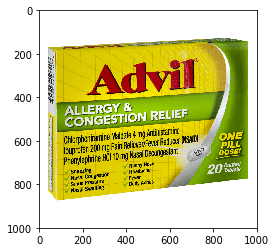

In [44]:
# get the maximum similar image
max_ratio, target = 0, 0
for index, val in enumerate(content):
    ratio = fuzz.partial_ratio(val, clean_test)
    if ratio > max_ratio:
        max_ratio = ratio
        target = index 
    print(str(ratio))
    
target_img = cv2.imread(files_grabbed[target])
target_img = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
plt.imshow(target_img)